In [3]:
import numpy as np
import matplotlib.pyplot as plt

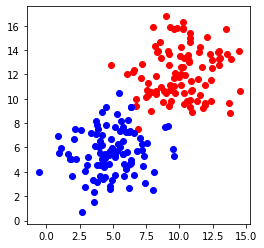

In [4]:
n_pts = 100
#here we get always the same random values... by fixing the seed
np.random.seed(0)

#T is the tranpose, to flip rows to columns...
top_region = np.array([
    #10 is the center of out normal distribution, 2 is std. deviation
    np.random.normal(10, 2, n_pts), 
    np.random.normal(12, 2, n_pts)]).T

bottom_region = np.array([
    np.random.normal(5, 2, n_pts), 
    np.random.normal(6, 2, n_pts)]).T

#Plotting!
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0],top_region[:, 1], color='red')
ax.scatter(bottom_region[:, 0],bottom_region[:, 1], color='blue')
plt.show()

In [5]:
def draw(x1,x2):
    ln = plt.plot(x1,x2)

def sigmoid(score):
    return 1/(1 + np.exp(-score))

def calculate_error(line_parameters, points, y):    
    m = points.shape[0]#Number of points
    p = sigmoid(points * line_parameters)
    cross_entropy = -(1/m) * (np.log(p).T * y + np.log(1-p).T * (1-y))
    return cross_entropy

In [6]:
n_pts = 100
bias = np.ones(n_pts)
#here we get always the same random values... by fixing the seed
np.random.seed(0)

#T is the tranpose, to flip rows to columns...
top_region = np.array([
    #10 is the center of out normal distribution, 2 is std. deviation
    np.random.normal(10, 2, n_pts), 
    np.random.normal(12, 2, n_pts),
    bias]).T
bottom_region = np.array([
    np.random.normal(5, 2, n_pts), 
    np.random.normal(6, 2, n_pts),
    bias]).T
all_points = np.vstack((top_region,bottom_region))

#Calculating Line 
w1 = -0.2
w2 = -0.33
b = 3.5
line_parameters = np.matrix([w1,w2,b]).T

#w1x1 + w2x2 + b = 0
x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
x2 = -b / w2 + x1 * (-w1 / w2)

#Label for error
#first(0's) n_pts are the top(red=0)
#second(1's) n_pts are the bottom(blue=1)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2,1)

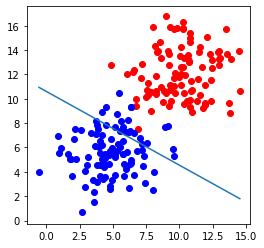

In [7]:
#Plotting!
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0],top_region[:, 1], color='red')
ax.scatter(bottom_region[:, 0],bottom_region[:, 1], color='blue')
draw(x1,x2)
plt.show()


In [8]:
print(calculate_error(line_parameters, all_points, y))

[[0.28746161]]


In [9]:
def gradient_descent (line_parameters, points, y, learning_rate):
    m = points.shape[0]
    for i in range(20000):
        p = sigmoid(points * line_parameters)
        gradient = (points.T * (p - y))*(learning_rate/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b  = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = -b / w2 + x1 * (-w1 / w2)        
    draw(x1,x2)

In [10]:
n_pts = 100
bias = np.ones(n_pts)
#here we get always the same random values... by fixing the seed
np.random.seed(0)

#T is the tranpose, to flip rows to columns...
top_region = np.array([
    #10 is the center of out normal distribution, 2 is std. deviation
    np.random.normal(10, 2, n_pts), 
    np.random.normal(12, 2, n_pts),
    bias]).T
bottom_region = np.array([
    np.random.normal(5, 2, n_pts), 
    np.random.normal(6, 2, n_pts),
    bias]).T
all_points = np.vstack((top_region,bottom_region))

#Now we start with 0 and wil use gradient descent to find the optimal line
line_parameters = np.matrix([np.zeros(3)]).T

#w1x1 + w2x2 + b = 0
#x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
#x2 = -b / w2 + x1 * (-w1 / w2)

#Label for error
#first(0's) n_pts are the top(red=0)
#second(1's) n_pts are the bottom(blue=1)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2,1)

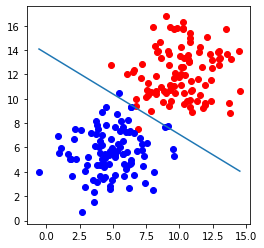

In [11]:
#Plotting!
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0],top_region[:, 1], color='red')
ax.scatter(bottom_region[:, 0],bottom_region[:, 1], color='blue')
#draw(x1,x2)
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()